# D606 Data Science Capstone 

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('medicaldataset.csv')

# Display the first few rows
print(df.head())

# Print the shape and columns of the DataFrame
print(df.shape)
print(df.columns)

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  
(1319, 9)
Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


In [ ]:
# Data Extraction and Preparation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the CSV file
df = pd.read_csv('medicaldataset.csv')

# Inspect for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Impute missing values (mean for numeric, most frequent for categorical)
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Handle outliers 
for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

# Normalize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Show cleaned data
print(df.head())
print(df.shape)
print(df.columns)

for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].unique()}")

Missing values per column:
 Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64
Duplicates: 0
        Age    Gender  Heart rate  Systolic blood pressure  \
0  0.583006  0.718395   -0.676470                 1.279552   
1 -2.527301  0.718395    1.191866                -1.136834   
2 -0.086357  0.718395   -0.809923                 1.279552   
3  0.583006  0.718395   -0.409565                -0.279407   
4 -0.086357  0.718395   -0.809923                -0.591199   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin    Result  
0                  0.795050     0.187994 -0.290977 -0.346036  negative  
1                 -1.924471     2.051729 -0.184088  0.802120  positive  
2                  0.354046     1.695427 -0.286875 -0.355896  negative  
3         

                Age        Gender    Heart rate  Systolic blood pressure  \
count  1.319000e+03  1.319000e+03  1.319000e+03             1.319000e+03   
mean  -7.811122e-17 -2.693490e-17 -1.804638e-16            -7.811122e-17   
std    1.000379e+00  1.000379e+00  1.000379e+00             1.000379e+00   
min   -2.527301e+00 -1.391991e+00 -1.677364e+00            -1.994262e+00   
25%   -6.813464e-01 -1.391991e+00 -8.099226e-01            -6.691468e-01   
50%    1.367641e-01  7.183954e-01 -1.426597e-01            -1.235111e-01   
75%    6.573799e-01  7.183954e-01  5.913295e-01             6.169943e-01   
max    2.219227e+00  7.183954e-01  3.260381e+00             3.150303e+00   

       Diastolic blood pressure   Blood sugar         CK-MB      Troponin  \
count              1.319000e+03  1.319000e+03  1.319000e+03  1.319000e+03   
mean              -2.720425e-16 -1.171668e-16  9.427216e-18 -4.848283e-17   
std                1.000379e+00  1.000379e+00  1.000379e+00  1.000379e+00   
min    

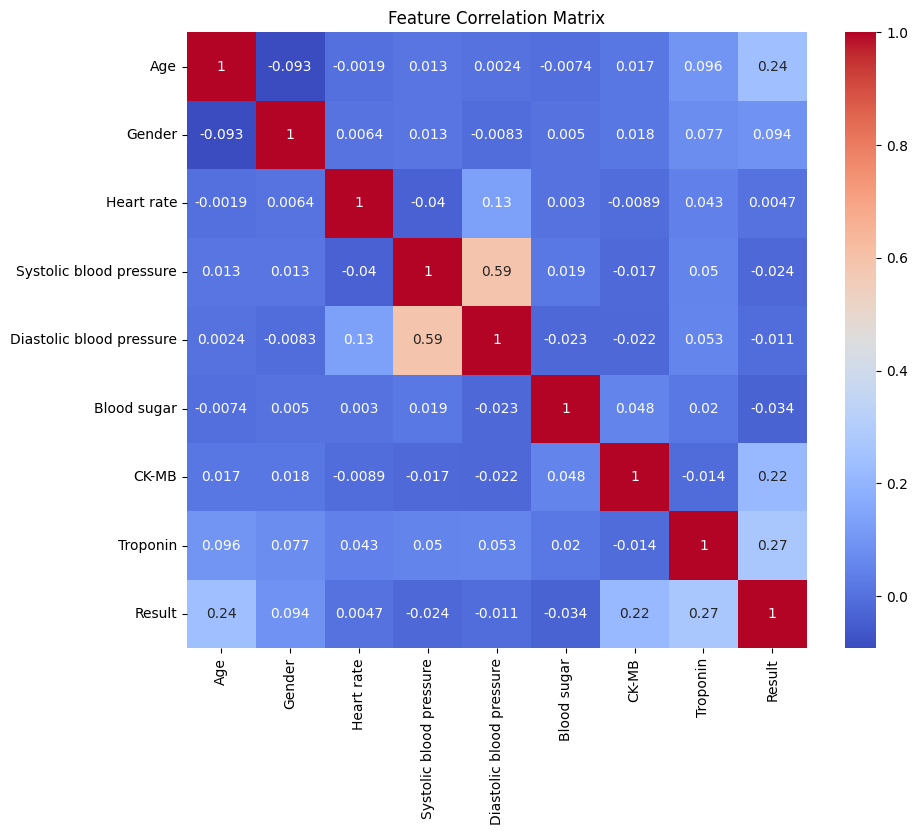


Logistic Regression Evaluation:
Confusion Matrix:
 [[ 70  31]
 [ 23 140]]
Accuracy: 0.7954545454545454
Precision: 0.8187134502923976
Recall: 0.8588957055214724
AUC-ROC: 0.8903298305290651

Random Forest Evaluation:
Confusion Matrix:
 [[ 97   4]
 [  2 161]]
Accuracy: 0.9772727272727273
Precision: 0.9757575757575757
Recall: 0.9877300613496932
AUC-ROC: 0.9903116078479012


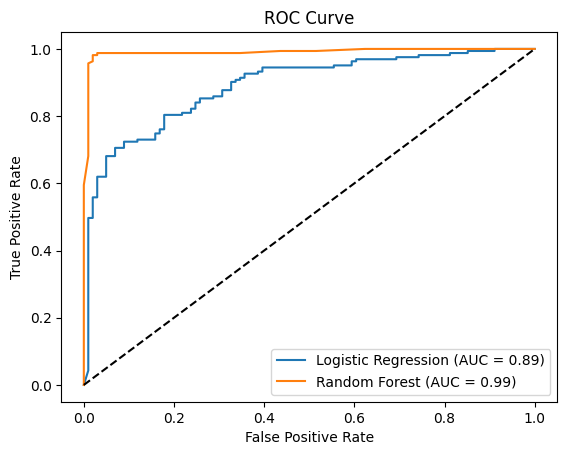

In [10]:
# Analysis

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Convert 'Result' to binary: negative=0, positive=1
df['Result'] = df['Result'].replace({'negative': 0, 'positive': 1})
# Descriptive statistics
print(df.describe())

# Correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Prepare features and target
X = df.drop('Result', axis=1)
y = df['Result'] # Convert to binary

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:,1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Model Evaluation
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')

evaluate_model(y_test, y_pred_logreg, y_prob_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()